# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'Data/train.p'
validation_file = 'Data/valid.p'
testing_file = 'Data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_valid))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

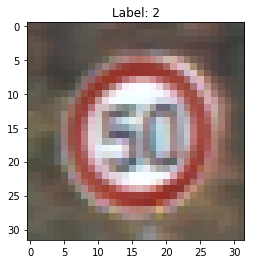

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import randrange

# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualize a random image from the training set and print the corresponding label
rand_int = randrange(0, n_train - 1)

image = X_train[rand_int]
label = y_train[rand_int]

plt.figure()
plt.title("Label: {}".format(label))
plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Normalize all RGB values from -1 to 1
data_pixel_mean = np.divide(X_train.mean() + X_valid.mean() + X_test.mean(), 3)
print("Current data pixel mean: {}".format(data_pixel_mean))

# Cast data to from uint8 to float32 to allow for negative values
X_train = X_train.astype(np.float32)
X_valid = X_valid.astype(np.float32)
X_test = X_test.astype(np.float32)

# Normalize RGB values for all data (Batch, height, width, [R,G,B])
for i in range(3):
    X_train[:,:,:,i] = (X_train[:,:,:,i] - 128) / 128
    X_valid[:,:,:,i] = (X_valid[:,:,:,i] - 128) / 128
    X_test[:,:,:,i] = (X_test[:,:,:,i] - 128) / 128

# Verify data adjustments
data_pixel_mean = np.divide(X_train.mean() + X_valid.mean() + X_test.mean(), 3)
print("Normalized data pixel mean: {}".format(data_pixel_mean))

Current data pixel mean: 82.794158924612
Normalized data pixel mean: -0.35317083199818927


### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

def traffic_sign_classifier(x, keep_prob):
    
    # Make all layer variables global for access outside of function (Layer Visualizations)
    global conv1
    global relus1
    global pooling1
    global conv2
    global relus2
    global pooling2
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0 # mean
    sigma = 0.1 # deviation
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # Set intial weights for filters based on the filter size 5 X 5
    # Input depth is 3, output depth is 6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma))
    
    # Biases must match output depth of filter
    conv1_b = tf.Variable(tf.zeros(6)) 
    conv1 = tf.nn.conv2d(x, conv1_W, strides=(1, 1, 1, 1), padding='VALID') # Perform the convolution
    conv1 = tf.nn.bias_add(conv1, conv1_b) # Add in the biases 
    
    # Activation for output of 1st convolutional layer
    relus1 = tf.nn.relu(conv1)
    
    # Pooling of 1st set of activations, Input = 28x28x6. Output = 14x14x6.
    pooling1 = tf.nn.max_pool(relus1, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID' )
    
    # Layer 2: Convolutional. Input = 14x14x6 Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pooling1, conv2_W, strides=(1,1,1,1), padding='VALID')
    conv2 = tf.nn.bias_add(conv2, conv2_b)
    
    # Activation for output of 2nd convolutional layer
    relus2 = tf.nn.relu(conv2)
    
    # Pooling of 2nd set of activations, Input = 10x10x16. Output = 5x5x16.
    pooling2 = tf.nn.max_pool(relus2, ksize=(1,2,2,1), strides=(1,2,2,1), padding='VALID')
    
    # Flatten the 2nd pooling set to prepare for the first fully connected layer.
    # *Weights will no longer be shared.* Input = 5x5x16. Output = 400.
    flatten = tf.contrib.layers.flatten(pooling2) 
    
    # Layer 3: Fully Connected. Input = 400. Output = 240. (output = intial number of nodes)
    full_layer1_W = tf.Variable(tf.truncated_normal(shape=(400, 240), mean=mu, stddev=sigma))
    full_layer1_b = tf.Variable(tf.zeros(240))
    full_layer1 = tf.add(tf.matmul(flatten, full_layer1_W), full_layer1_b)
    
    # Activation for output of 1st fully connected layer.
    relus3 = tf.nn.relu(full_layer1)
    
    # Drop out data when training to combat overfitting
    relus3 = tf.nn.dropout(relus3, keep_prob)
    
    # Layer 4: Fully Connected. Input = 240. Output = 100. (output = refine nodes to 100)
    full_layer2_W = tf.Variable(tf.truncated_normal(shape=(240, 100), mean=mu, stddev=sigma))
    full_layer2_b = tf.Variable(tf.zeros(100))
    full_layer2 = tf.add(tf.matmul(relus3, full_layer2_W), full_layer2_b)
    
    # Activation for output of 2nd fully connected layer.
    relus4 = tf.nn.relu(full_layer2)
     
    # Drop out data when training to combat overfitting
    relus4 = tf.nn.dropout(relus4, keep_prob)
    
    # Layer 5: Fully Connected. Input = 100. Output = 43. (output = final number of labels for dataset)
    full_layer3_W = tf.Variable(tf.truncated_normal(shape=(100, 43), mean=mu, stddev=sigma))
    full_layer3_b = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(relus4, full_layer3_W), full_layer3_b)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.

from sklearn.utils import shuffle

# Set up placeholder values for tensorflow to feed data
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # image input dimensions, batch size is None
y = tf.placeholder(tf.int32, (None)) # label place holder, batch size is None
one_hot_y = tf.one_hot(y, 43) # one hot encode all label values for classifier
keep_prob = tf.placeholder(tf.float32) # place holder value to feed diffrent dropout rates (training vs validation)

# Training hyperparameters
EPOCHS = 50
BATCH_SIZE = 256
learning_rate = 0.001

# Training pipeline
logits = traffic_sign_classifier(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

### Calculate and report the accuracy on the training and validation set.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Evaulate the loss and accuracy
def evaluate(X_data, y_data, keep_probability):
    
    num_examples = len(X_data)
    total_accuracy = 0
    
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_probability})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples


with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training and validation...")
    print()
    
    for i in range(EPOCHS):
        
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]  
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        training_accuracy = evaluate(X_train, y_train, 0.5)
        validation_accuracy = evaluate(X_valid, y_valid, 1.0)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './Trained-Model/traffic-signs.ckpt')
    print("Model saved")
    

Training and validation...

EPOCH 1 ...
Training Accuracy = 0.440
Validation Accuracy = 0.497

EPOCH 2 ...
Training Accuracy = 0.681
Validation Accuracy = 0.779

EPOCH 3 ...
Training Accuracy = 0.791
Validation Accuracy = 0.857

EPOCH 4 ...
Training Accuracy = 0.850
Validation Accuracy = 0.893

EPOCH 5 ...
Training Accuracy = 0.879
Validation Accuracy = 0.908

EPOCH 6 ...
Training Accuracy = 0.901
Validation Accuracy = 0.927

EPOCH 7 ...
Training Accuracy = 0.915
Validation Accuracy = 0.933

EPOCH 8 ...
Training Accuracy = 0.927
Validation Accuracy = 0.930

EPOCH 9 ...
Training Accuracy = 0.935
Validation Accuracy = 0.939

EPOCH 10 ...
Training Accuracy = 0.943
Validation Accuracy = 0.946

EPOCH 11 ...
Training Accuracy = 0.947
Validation Accuracy = 0.952

EPOCH 12 ...
Training Accuracy = 0.950
Validation Accuracy = 0.947

EPOCH 13 ...
Training Accuracy = 0.953
Validation Accuracy = 0.943

EPOCH 14 ...
Training Accuracy = 0.960
Validation Accuracy = 0.948

EPOCH 15 ...
Training Accurac

In [8]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Run model on test set with no dropout enabled
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('Trained-Model/.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.948


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Number of images: 5
Image shape: (32, 32, 3)


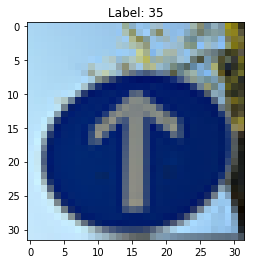

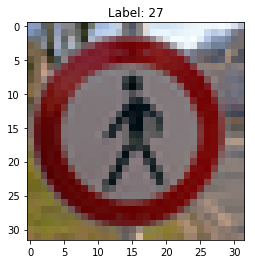

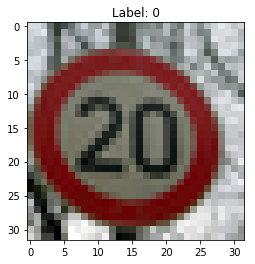

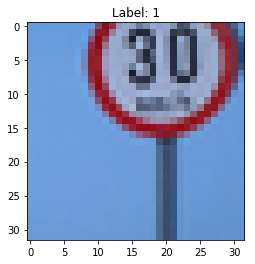

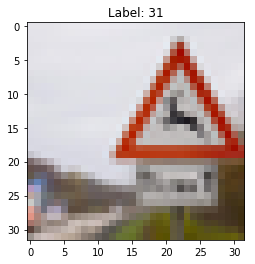

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import glob
from PIL import Image

# Set up a 4D array of (images, height, width, depth)
# Set corresponding label for each image
downloaded_images = []
downloaded_image_labels = [35, 27, 0, 1, 31]

for i, image in enumerate(glob.glob('New-German-Signs/*.jpg')):
    resized_img = Image.open(image) # open the image in pillow for resizing
    resized_img.thumbnail((32, 32), Image.ANTIALIAS) # resizes the image in place (32,32,3)
    
    np_resized_img = np.array(resized_img) # convert to numpy array with shape (32,32,3)
    resized_img.close() # close out the image
    
    downloaded_images.append(np_resized_img) #add the image to the list of downloaded images
   
    # Plot each image
    plt.figure()
    plt.title("Label: {}".format(downloaded_image_labels[i]))
    plt.imshow(np_resized_img)
    
downloaded_images = np.array(downloaded_images) # create the 4D numpy array of images (5,32,32,3)

print("Number of images: {}".format(len(downloaded_images)))
print("Image shape: {}".format(downloaded_images[0].shape))

### Predict the Sign Type for Each Image

In [9]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Preproccess new images
# Normalize all RGB values from -1 to 1
downloaded_image_pixel_mean = np.divide(sum(i.mean() for i in downloaded_images), len(downloaded_images))
print("Current data pixel mean: {}".format(downloaded_image_pixel_mean))

# # Cast data to from uint8 to float32 to allow for negative values
downloaded_images = downloaded_images.astype(np.float32)

# Normalize RGB values for all data (Batch, height, width, [R,G,B])
for i in range(3):
    downloaded_images[:,:,:,i] = (downloaded_images[:,:,:,i] - 128) / 128
    
# Verify data adjustments
downloaded_image_pixel_mean = np.divide(sum(i.mean() for i in downloaded_images), len(downloaded_images))
print("Normalized data pixel mean: {}".format(downloaded_image_pixel_mean))


Current data pixel mean: 127.76731770833335
Normalized data pixel mean: -0.0018178313970565797


In [10]:
# Make a prediction for each new sign and output

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('Trained-Model/.'))

    predictions = sess.run(tf.nn.softmax(logits = logits), feed_dict = {x: downloaded_images, keep_prob: 1.0}) # Disable dropout

for i in range(len(downloaded_images)):
    print("Image {} Label Prediction: {}".format(i + 1, np.argmax(predictions[i])))

print()
print(predictions)

Image 1 Label Prediction: 35
Image 2 Label Prediction: 1
Image 3 Label Prediction: 0
Image 4 Label Prediction: 35
Image 5 Label Prediction: 12

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   3.88577202e-32
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.13580943e-31   6.08671516e-26   0.00000000e+00
    7.00259206e-32   2.04098708e-35   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.21783397e-32   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   3.90294430e-25   1.97131982e-30   1.00000000e+00
    6.38296224e-33   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  4.98019066e-03   9.24890280e-01   6.51303012e-08   1.91672063e-13
    6.93147257e-02   7.79946731e

### Analyze Performance

In [11]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('Trained-Model/.'))

    downloaded_image_accuracy = evaluate(downloaded_images, downloaded_image_labels, 1.0)
    print("Downloaded Image Accuracy = {:.3f}".format(downloaded_image_accuracy))

Downloaded Image Accuracy = 0.400


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [12]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top_five_prob = sess.run(tf.nn.top_k(tf.constant(predictions), k = 5)) # output the top k number of probabilties

for i in range(len(top_five_prob[0])):
    print()
    print("Top Five Probabilities For Image {}: {} \n".format(i + 1, top_five_prob[0][i]))
    print("Top Indices: {}".format(top_five_prob[1][i]))
    print("-" * 50)
    



Top Five Probabilities For Image 1: [  1.00000000e+00   3.90294430e-25   6.08671516e-26   1.97131982e-30
   1.13580943e-31] 

Top Indices: [35 33 10 34  9]
--------------------------------------------------

Top Five Probabilities For Image 2: [  9.24890280e-01   6.93147257e-02   4.98019066e-03   6.89232431e-04
   7.72857893e-05] 

Top Indices: [ 1  4  0 18 40]
--------------------------------------------------

Top Five Probabilities For Image 3: [  9.33362544e-01   5.15838526e-02   1.48055833e-02   2.16131753e-04
   3.16748774e-05] 

Top Indices: [ 0  1  8  4 29]
--------------------------------------------------

Top Five Probabilities For Image 4: [  9.13291514e-01   8.59597176e-02   6.95529045e-04   4.81049574e-05
   4.56225598e-06] 

Top Indices: [35 10 12  9 13]
--------------------------------------------------

Top Five Probabilities For Image 5: [ 0.41010168  0.31409448  0.21269576  0.04876773  0.0084946 ] 

Top Indices: [12 19  9 17 41]
-------------------------------------

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [13]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min= -1, activation_max= -1 ,plt_num= 1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    
    for featuremap in range(featuremaps):
        
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[plt_num,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[plt_num,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[plt_num,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[plt_num,:,:, featuremap], interpolation="nearest", cmap="gray")


Image Number: 1
--------------------------------------------------

<--------Layer 1-------->


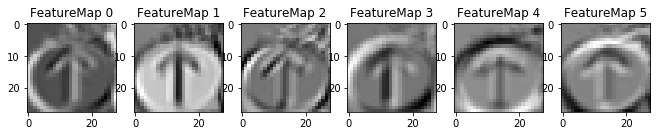

<--------Layer 2-------->


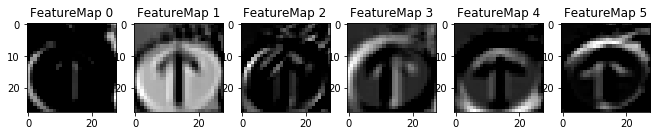

<--------Layer 3-------->


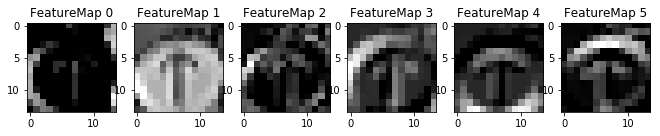

<--------Layer 4-------->


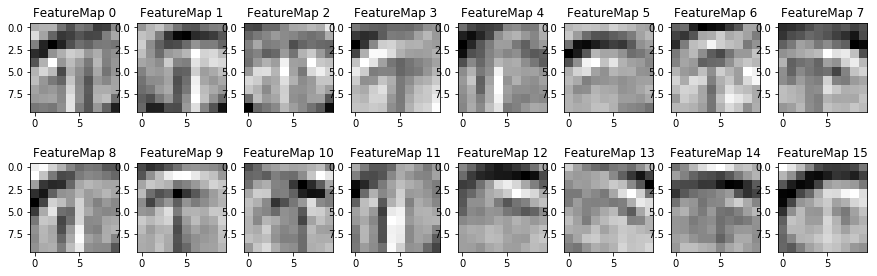

<--------Layer 5-------->


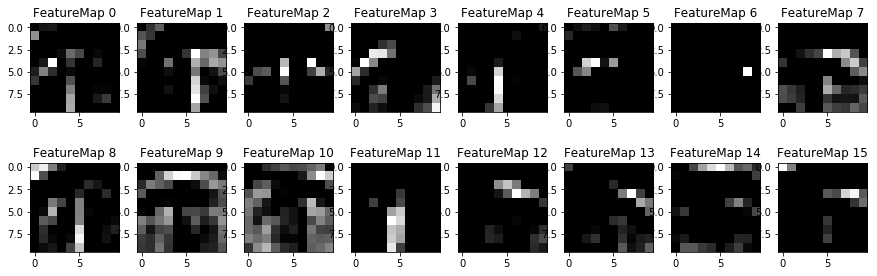

<--------Layer 6-------->


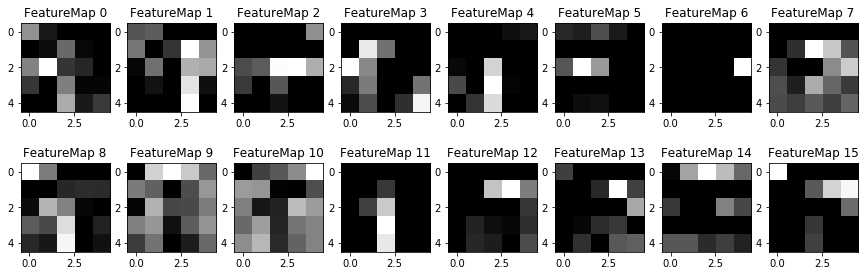


Image Number: 2
--------------------------------------------------

<--------Layer 1-------->


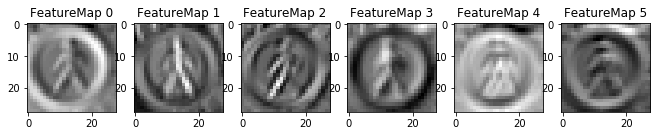

<--------Layer 2-------->


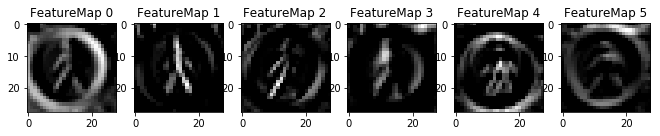

<--------Layer 3-------->


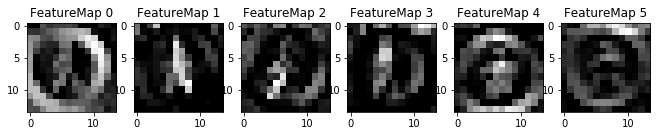

<--------Layer 4-------->


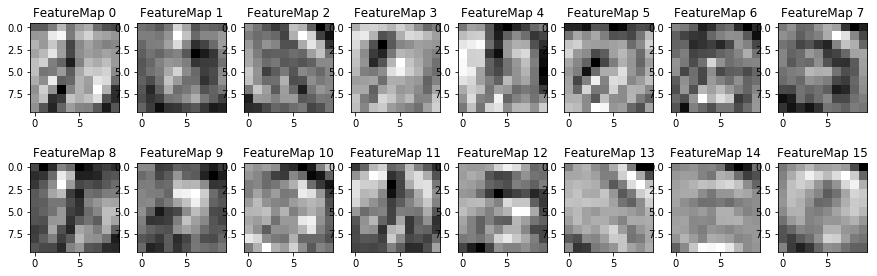

<--------Layer 5-------->


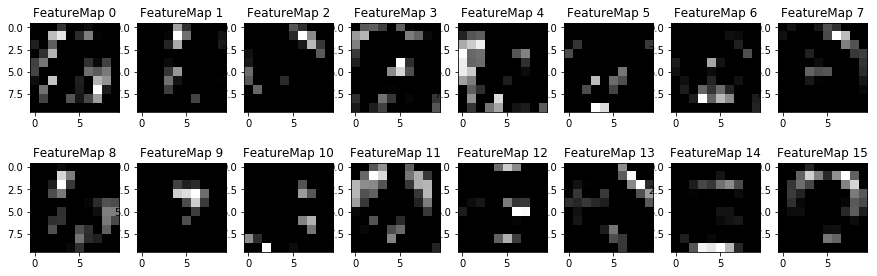

<--------Layer 6-------->


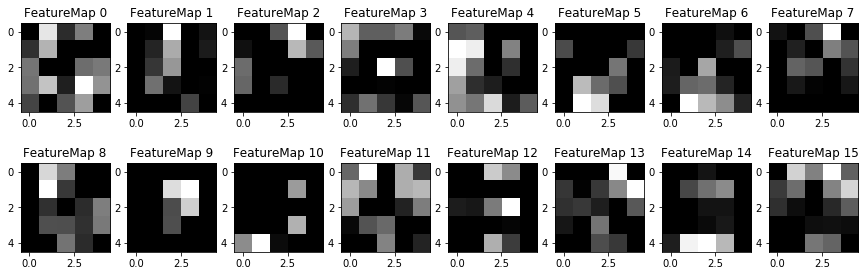


Image Number: 3
--------------------------------------------------

<--------Layer 1-------->


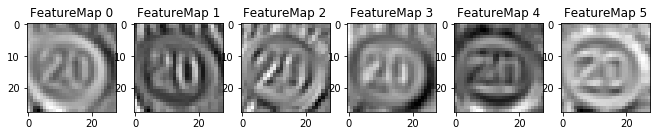

<--------Layer 2-------->


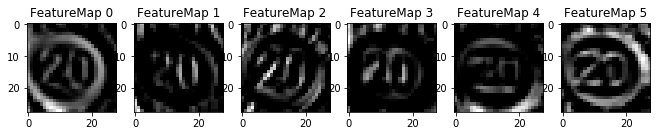

<--------Layer 3-------->


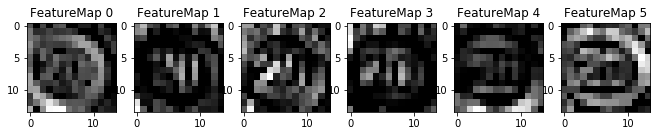

<--------Layer 4-------->


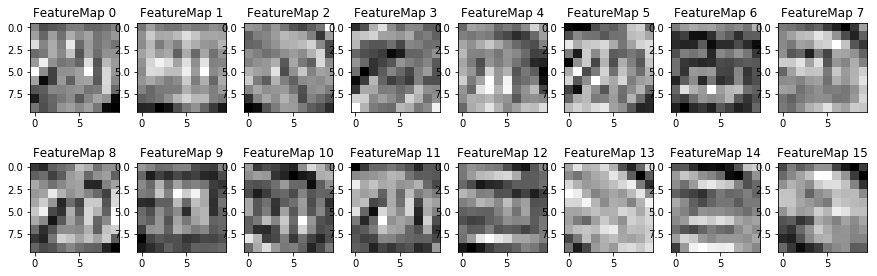

<--------Layer 5-------->


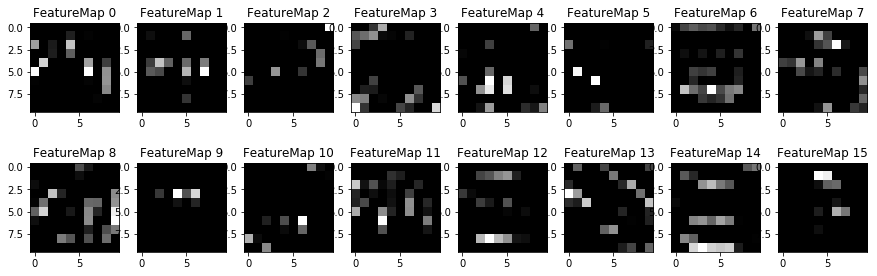

<--------Layer 6-------->


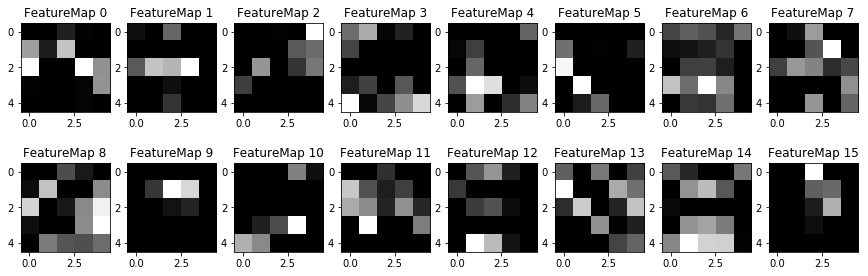


Image Number: 4
--------------------------------------------------

<--------Layer 1-------->


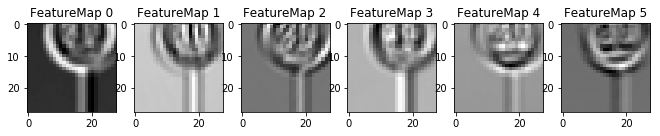

<--------Layer 2-------->


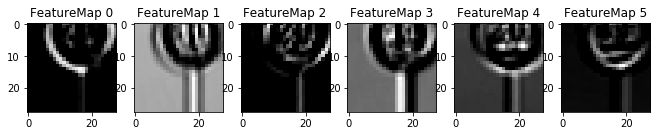

<--------Layer 3-------->


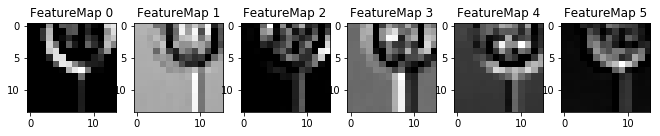

<--------Layer 4-------->


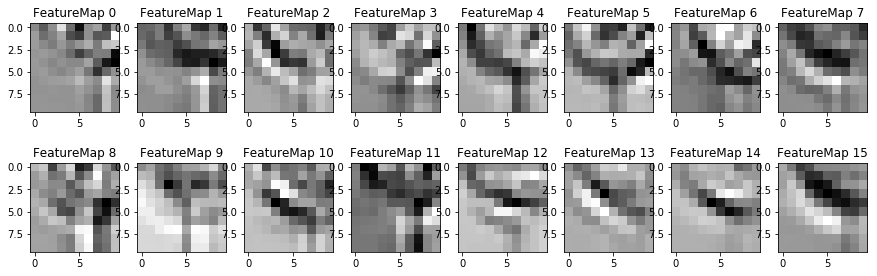

<--------Layer 5-------->


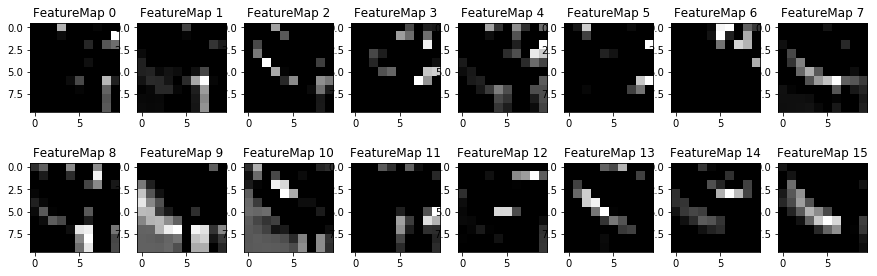

<--------Layer 6-------->


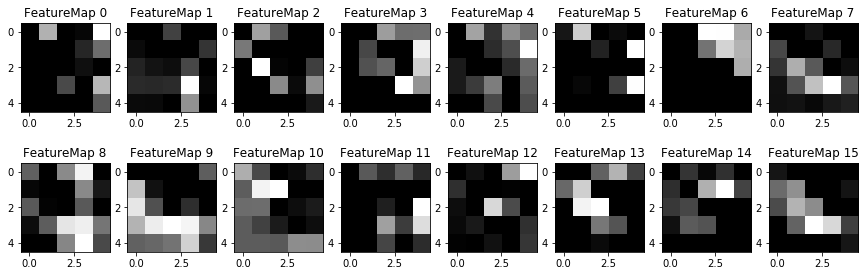


Image Number: 5
--------------------------------------------------

<--------Layer 1-------->


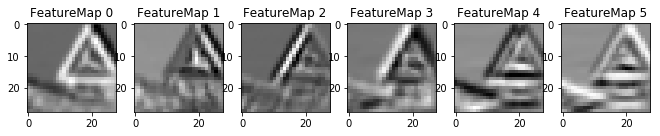

<--------Layer 2-------->


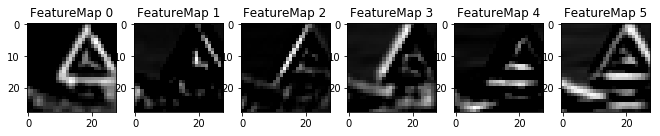

<--------Layer 3-------->


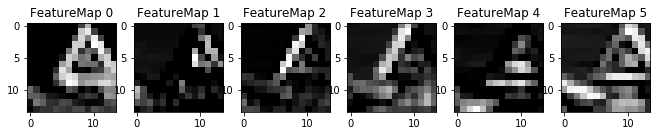

<--------Layer 4-------->


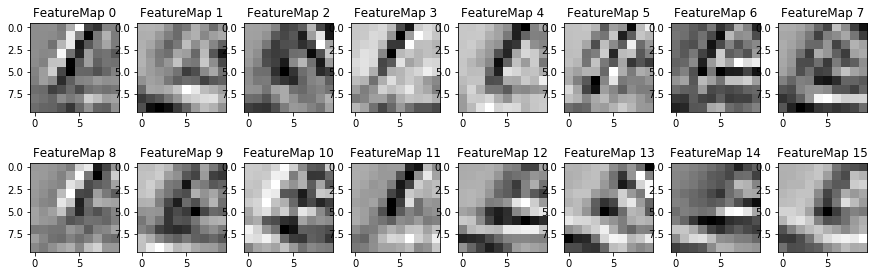

<--------Layer 5-------->


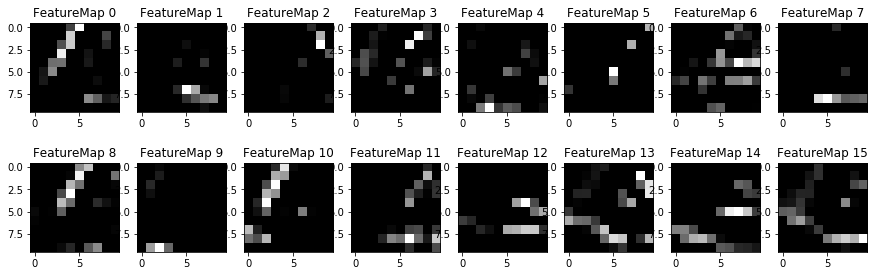

<--------Layer 6-------->


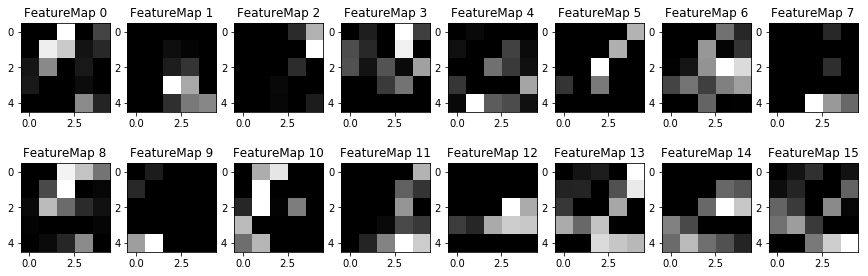

In [14]:
# Layers to be visualized
nn_layers = [conv1, relus1, pooling1, conv2 ,relus2, pooling2]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('Trained-Model/.'))
    
    
    for i in range(len(downloaded_images)):  
        print()
        print("Image Number: {}".format(i + 1)) # count out the images to be displayed
        print("-" * 50)
        print()
        
        for j, layer in enumerate(nn_layers):
            plt.figure(num = len(downloaded_images))
            print("<--------Layer {}-------->".format(j + 1)) # layer for each image
            outputFeatureMap(downloaded_images, layer, plt_num = i)
            plt.show()

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:** In the above illustrations you can clearly see how the network is identifying features of interest and filtering them as they proceed through the network. Interestingly enough the initial layers tend to pick up on the image features that human eyes would typically look at. For example, the first layer in all of the images clearly shows a focus on the sign shape and graphic depicted on the sign. Moving through the convolutions, pooling, and relu layers you can see how the network tries to focus in on particular parts of the image it thinks are important. If you look closely as the layers proceed for each image you can see that the images begin to be zoomed, important features begin to carry more weight and add value to the final prediction and obtain a primary focus in the different filters. Towards the final layers, the image takes on its most abstracted representation but you can still clearly see areas of high and low interest as it stands within the network.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 